In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-07-30 10:30:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-07-30 10:30:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-07-30 10:30:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

# PCA 클래스

`pca = PCA(n_components = 50)` 의 n_components는 찾을 주성분의 개수이다.

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

# 50개의 주성분을 찾는다.
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 10개씩 이미지를 그리기. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그리기.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

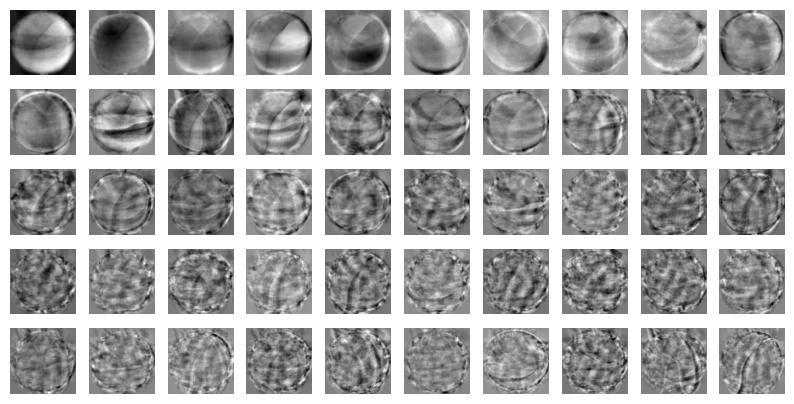

(300, 10000)


In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

print(fruits_2d.shape)

In [7]:
# transform 으로 10000개의 특성을 50개로 변환한다
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)

print(fruits_inverse.shape)

(300, 10000)


In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

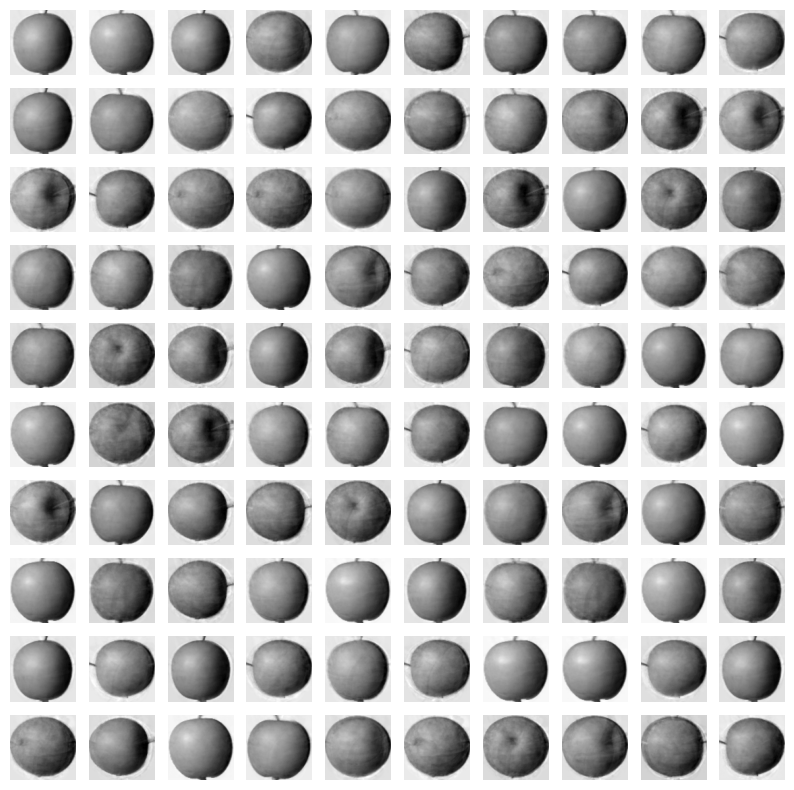

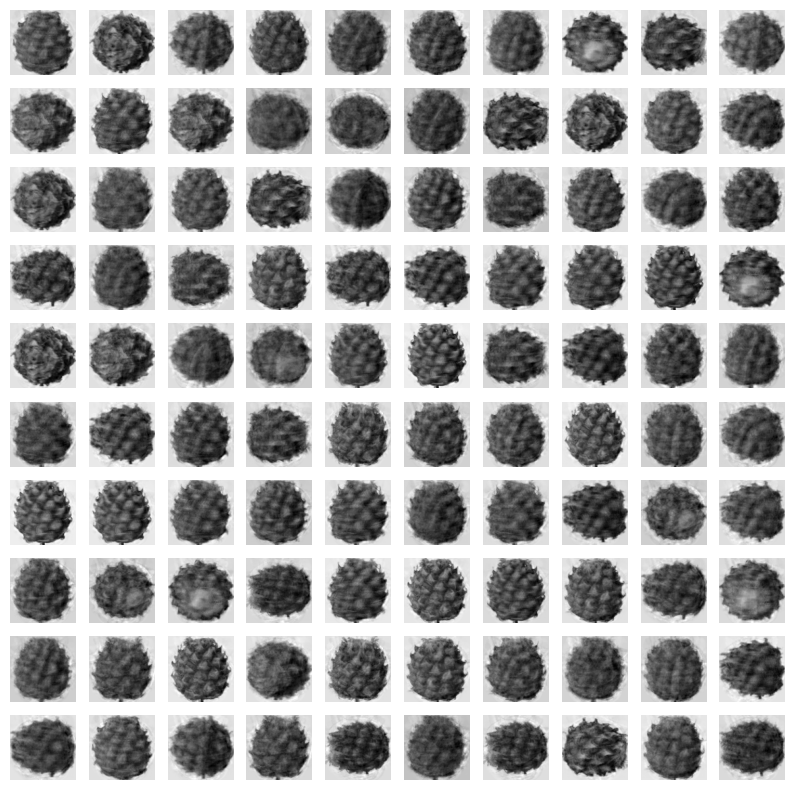

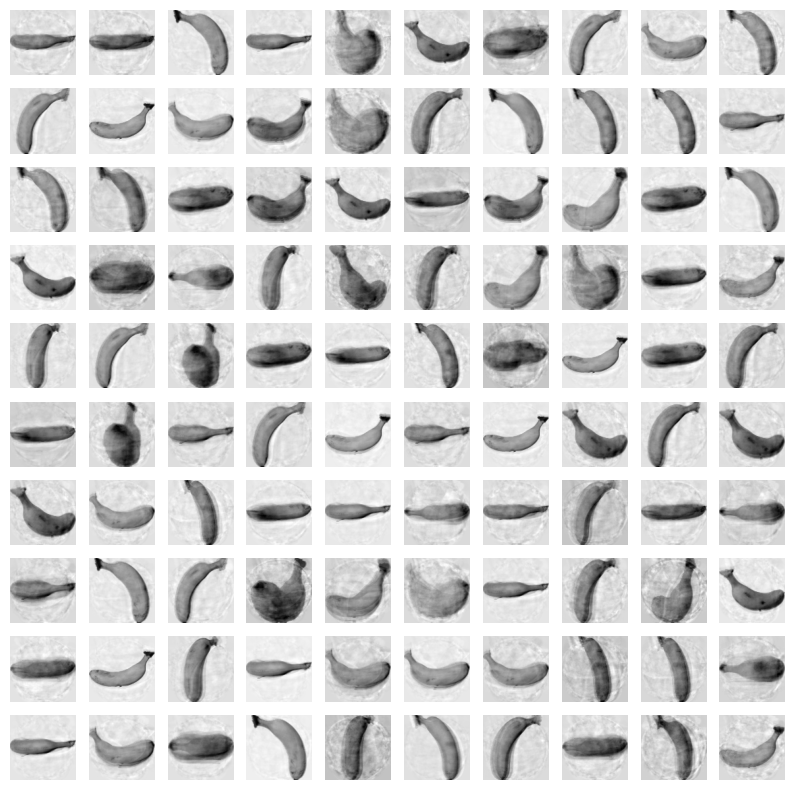

In [10]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.921441469933533


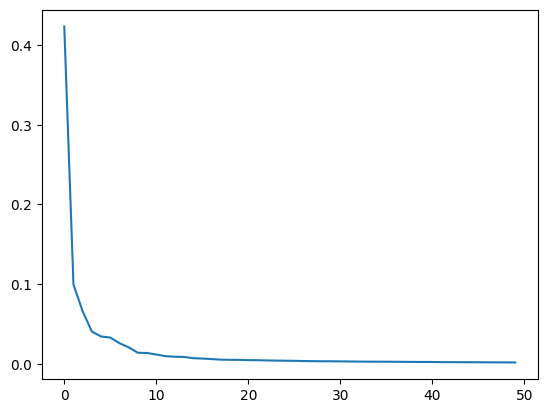

In [12]:
plt.plot(pca.explained_variance_ratio_)

# 분류기와 함께 사용

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

LogisticRegression 로지스틱 회귀 모델을 사용하였을 때,    
훈련시간은 2초, 교차검증 점수는 0.99이다.


pca로 50개의 특성으로 축소한 데이터를 사용하였을 때,    
훈련시간은 0.02초, 교차검증 점수는 1로 정확도 100%이다.

In [15]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.186085844039917


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.030573654174804687


In [17]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [18]:
print(pca.n_components_)

2


transform을 사용하여 원본 데이터를 변환한다.
2개의 특성만 사용하게 된다

In [19]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성만 사용했어도 99%정확도를 보인다

In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05146379470825195


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# 군집과 함께 사용

In [21]:
from sklearn.cluster import KMeans

km = KMeans (n_clusters = 3, random_state = 42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

*   클러스터 개수는 3개이다.
*   배열의 유니크 값을 출력하면 0,1,2로 뜬다.
*   클러스터는 각각 110, 99, 91개의 샘플을 포함하고 있다.

In [22]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


파인애플은 사과와 조금 혼돈되는 면이 있다.

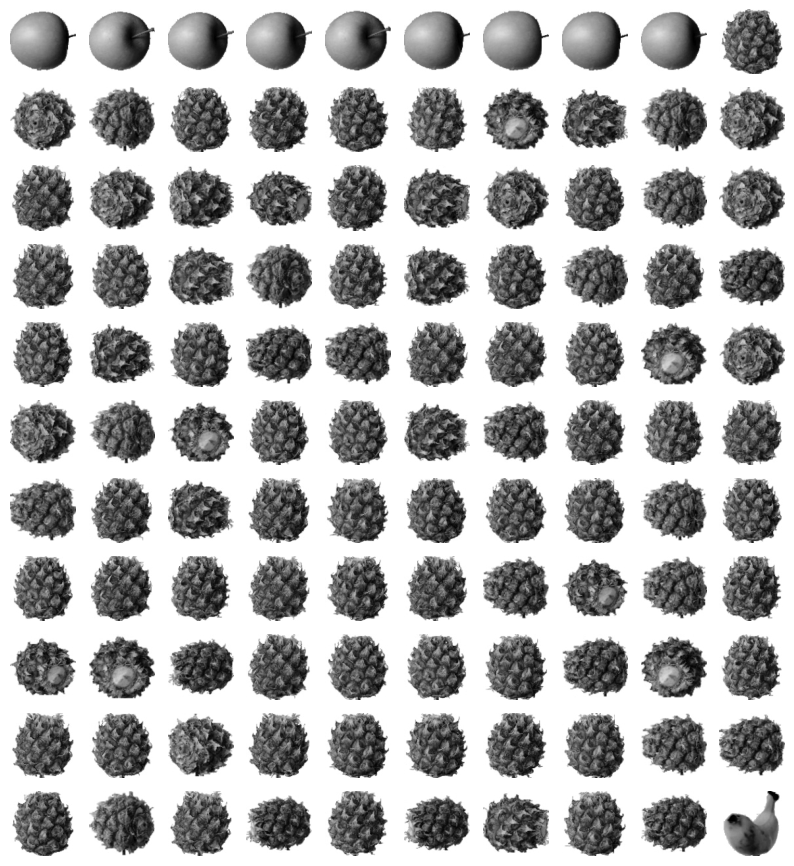

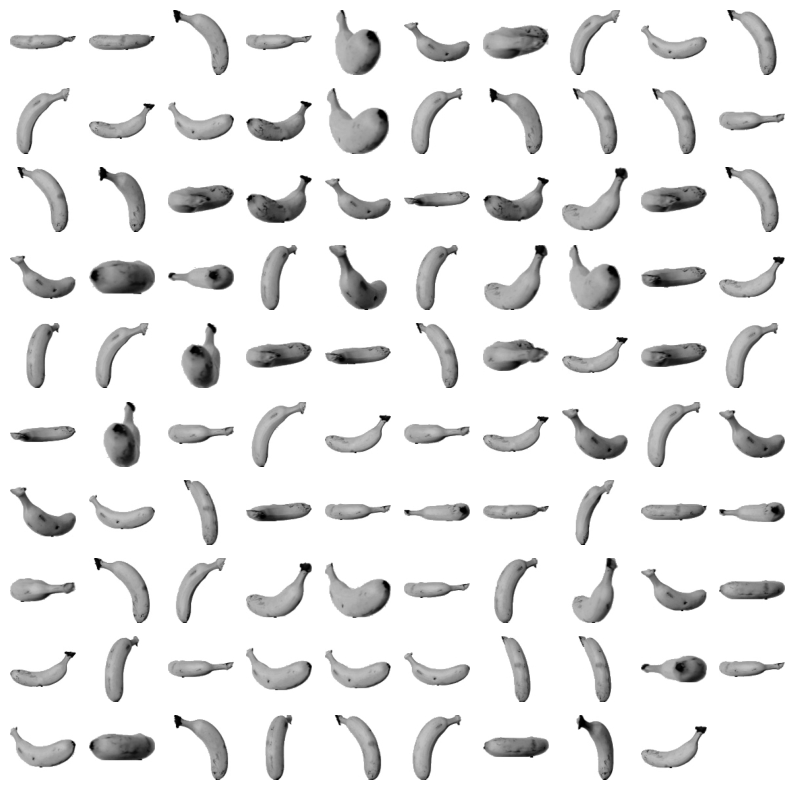

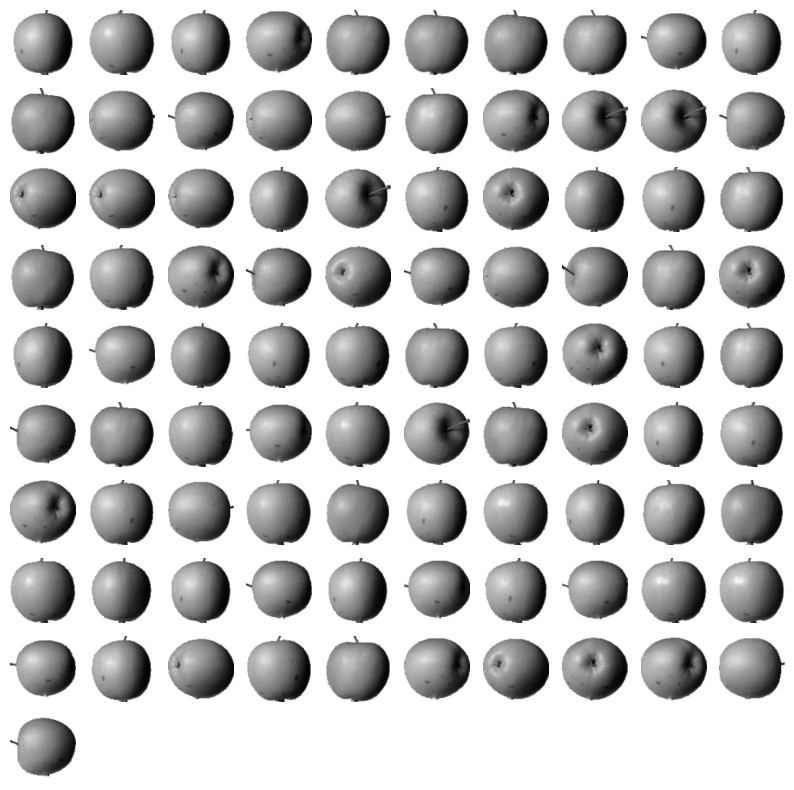

In [23]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

# 시각화

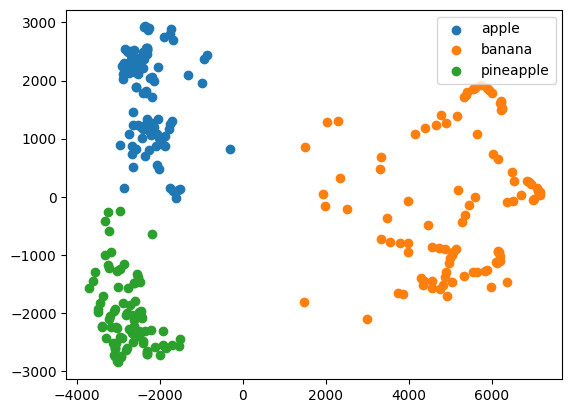

In [24]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()